# Lead Score Assignment
#### Objective
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing python built in libraries

import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To scale our data
from sklearn.preprocessing import scale

## Step 1: Data Reading & Inspection

### Reading data

In [3]:
lead_score = pd.read_csv("C:/PGDDS/Machine_learning/lead_scoring_assignment/Leads.csv")
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspecting Data

In [4]:
lead_score.shape

(9240, 37)

In [5]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Preparation

In [7]:
# Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Count of Null values
lead_score.isnull().sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

#### Replacing 'Select' with Null as per problem statement

In [9]:
# Making 'select' values to Null
lead_score.replace('Select', np.nan, inplace=True)

In [10]:
# Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Again counting number of Null values
lead_score.isnull().sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Data Preparation

#### Dropping column having more than 3000 Null values

In [12]:
# Dropping column having more than 3000 Null values
lead_score.drop(['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City',
                 'Asymmetrique Activity Index','Asymmetrique Profile Index',
                 'Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

In [13]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Inspecting single value columns

In [14]:
# Inspecting wether any column has only 1 value
lead_score.describe(include='all').loc['unique', :]

Prospect ID                                      9240
Lead Number                                       NaN
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                         NaN
TotalVisits                                       NaN
Total Time Spent on Website                       NaN
Page Views Per Visit                              NaN
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [15]:
# Removing those columns having only 1 value
lead_score.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1, inplace=True)

#### Inspecting column having two values

##### Do Not Email column

In [16]:
lead_score['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

##### Do Not Call column

In [17]:
lead_score['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

This column has __99.978% values as No__

##### Search column

In [18]:
lead_score['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

This column has __99.85% values as No__

##### Newspaper Article column

In [19]:
lead_score['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

This column has __99.978% values as No__

##### X Education Forums column

In [20]:
lead_score['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

This column has __99.989% values as No__

##### Newspaper column

In [21]:
lead_score['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

This column has __99.989% values as No__

##### Digital Advertisement column

In [22]:
lead_score['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

This column has __99.95% values as No__

##### Through Recommendations column

In [23]:
lead_score['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

This column has __99.92% values as No__

##### A free copy of Mastering The Interview column

In [24]:
lead_score['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Removing column having more than 99% single value
The columns which have predominantly one value, can be dropped

In [25]:
lead_score.drop(["Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                "Through Recommendations"], axis=1, inplace=True)

In [26]:
# Again Checking Null values %
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

#### Inspecting columns having more than 25% Null values

##### Country column

In [27]:
lead_score['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Netherlands                2
China                      2
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Belgium                    2
Philippines                2
Italy                      2
Bangladesh                 2
Kenya                      1
Denmark                    1
Sri Lanka                  1
Malaysia                   1
Switzerland                1
Tanzania                   1
Russia        

##### What is your current occupation column
"What is your current occupation" has almost 30% null values. Deleting so many rows will result in loosing a lot of data set. And this looks like an important feature for analysis. So the null values can be imputed to 'Other'

In [28]:
lead_score["What is your current occupation"].fillna('Other',inplace=True)

In [29]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

##### What matters most to you in choosing a course column

In [30]:
lead_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Removing column having high Null values and not significant for analysis

In [31]:
lead_score.drop(['Country','What matters most to you in choosing a course'], axis=1, inplace=True)

In [32]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Removing ID columns

In [33]:
lead_score.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

In [34]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Inspecting Remaining columns

##### Lead Origin column

In [35]:
lead_score['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

##### Lead Source column

In [36]:
lead_score['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
NC_EDM                  1
testone                 1
youtubechannel          1
Pay per Click Ads       1
blog                    1
welearnblog_Home        1
WeLearn                 1
Name: Lead Source, dtype: int64

In Lead Source same value is entered as  __Google and google__. Converting __google to Google.__

In [37]:
# Replacing google with Google
lead_score['Lead Source']=lead_score['Lead Source'].replace('google','Google')

##### Do Not Email column

In [38]:
lead_score['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

##### Last Activity column

In [39]:
lead_score['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### A free copy of Mastering The Interview column

In [40]:
lead_score['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

##### Last Notable Activity column

In [41]:
lead_score['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [42]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Null value treatment

In [43]:
# Removing rows having Na's
lead_score.dropna(axis=0, inplace=True)

In [44]:
# Again Checking Null values
round(100*(lead_score.isnull().sum(axis=0)/len(lead_score)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Renaming the columns for better readability

In [45]:
lead_score = lead_score.rename(columns={"Lead Origin":"LeadOrigin","Lead Source":"LeadSource","Do Not Email":"DoNotEmail",
                                        "Total Time Spent on Website":"TotTimeSpent",
                                        "Page Views Per Visit":"PageViewsPerVisit","Last Activity":"LastActivity",
                                        "What is your current occupation":"CurrentOccupation",
                                        "A free copy of Mastering The Interview":"FreeCopy",
                                        "Last Notable Activity":"LastNotableActivity"})

### Visualization on different variables
As per our business understanding there are few variables like 
- LeadOrigin
- LeadSource
- TotTimeSpent
- CurrentOccupation
- Last Activity 

Should have significant impact on the conversion of a lead.

Analyzing these variables with respect to conversion status to have a initial view.

##### LeadOrigin column

In [46]:
temp2=lead_score.groupby(["LeadOrigin"]).sum()["Converted"]
temp2

LeadOrigin
API                        1115
Landing Page Submission    1767
Lead Add Form               544
Lead Import                   9
Name: Converted, dtype: int64

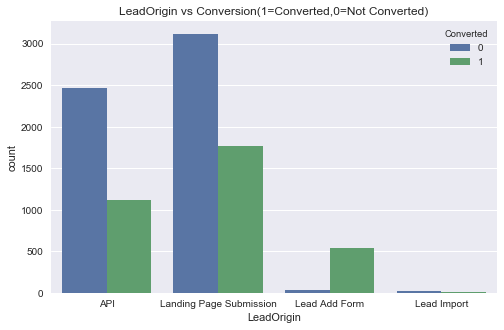

In [47]:
# Its evident that landing Page submission is a important parameter for conversion followed by API.
plt.figure(figsize=(8, 5))
plt.title("LeadOrigin vs Conversion(1=Converted,0=Not Converted)")
sns.countplot(x="LeadOrigin",hue="Converted",data=lead_score)

##### LeadSource column

In [48]:
temp3=lead_score.groupby(["LeadSource"]).sum()["Converted"]
temp3

LeadSource
Click2call              3
Direct Traffic        818
Facebook                9
Google               1147
Live Chat               2
NC_EDM                  1
Olark Chat            448
Organic Search        436
Pay per Click Ads       0
Press_Release           0
Reference             410
Referral Sites         31
Social Media            1
WeLearn                 1
Welingak Website      127
bing                    1
blog                    0
testone                 0
welearnblog_Home        0
youtubechannel          0
Name: Converted, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

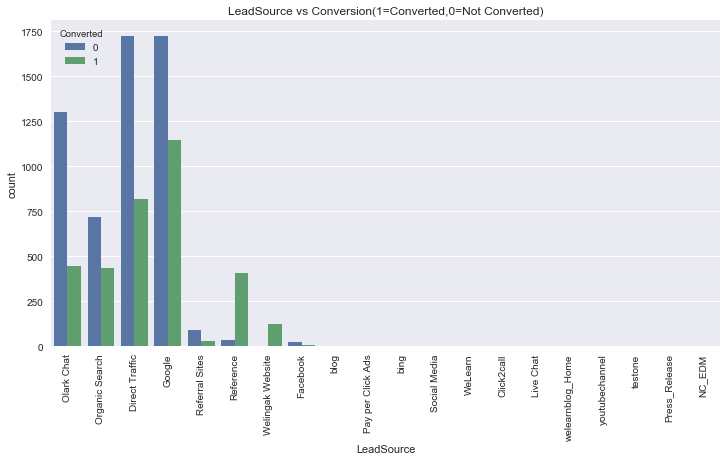

In [49]:
# Its evident that Direct Traffic and Google are important parameters for conversion followed by Olark Chat.
# Olark chat is a popular software to Identify and engage your most qualified leads with features like automated messaging, 
# custom pre-chat surveys and in-depth reporting
plt.figure(figsize=(12, 6))
plt.title("LeadSource vs Conversion(1=Converted,0=Not Converted)")
sns.countplot(x="LeadSource",hue="Converted",data=lead_score)
plt.xticks(rotation=90)

##### CurrentOccupation column

In [50]:
temp4=lead_score.groupby(["CurrentOccupation"]).sum()["Converted"]
temp4

CurrentOccupation
Businessman                5
Housewife                  9
Other                    379
Student                   74
Unemployed              2346
Working Professional     622
Name: Converted, dtype: int64

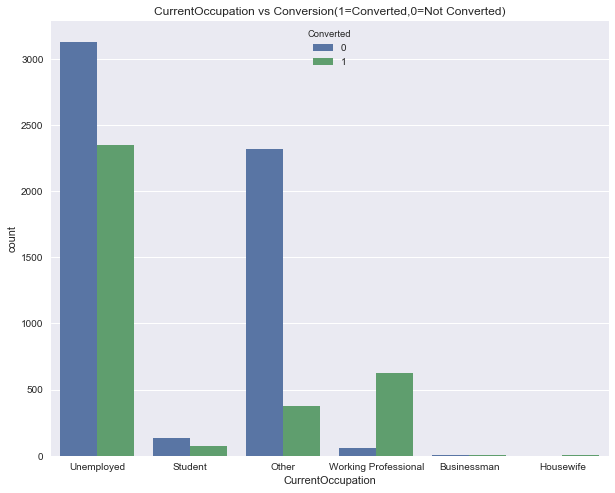

In [51]:
# Its evident that Unemployed have maximum conversion so that they can get employed followed by Working professionals 
# for career progression.
plt.figure(figsize=(10, 8))
plt.title("CurrentOccupation vs Conversion(1=Converted,0=Not Converted)")
sns.countplot(x="CurrentOccupation",hue="Converted",data=lead_score)

##### LastActivity column

In [52]:
temp5=lead_score.groupby(["LastActivity"]).sum()["Converted"]
temp5

LastActivity
Approached upfront                 5
Converted to Lead                 54
Email Bounced                     16
Email Link Clicked                73
Email Marked Spam                  2
Email Opened                    1250
Email Received                     2
Form Submitted on Website         28
Had a Phone Conversation          20
Olark Chat Conversation           84
Page Visited on Website          151
Resubscribed to emails             1
SMS Sent                        1705
Unreachable                       29
Unsubscribed                      14
View in browser link Clicked       1
Visited Booth in Tradeshow         0
Name: Converted, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

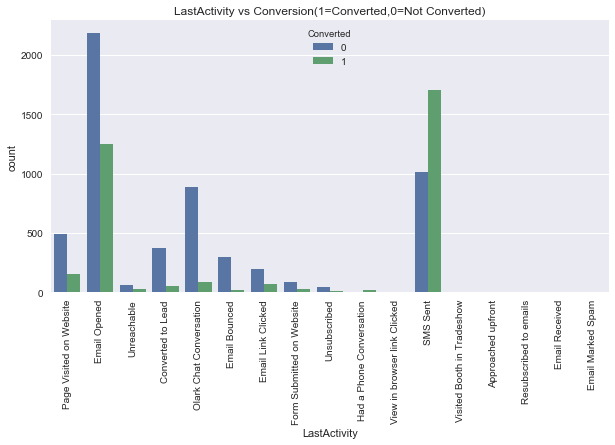

In [53]:
# Its evident that SMS sent has maximum conversion followed by Email Opened as t indicates the followup by agent 
# and interest from the lead to join the course.
plt.figure(figsize=(10, 5))
plt.title("LastActivity vs Conversion(1=Converted,0=Not Converted)")
sns.countplot(x="LastActivity",hue="Converted",data=lead_score)
plt.xticks(rotation=90)

##### TotTimeSpent column

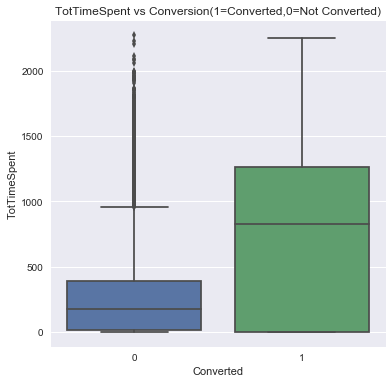

In [54]:
# It is evident from the boxplot that there are more no. of conversion when total time spent on the website by 
# prospective lead is increased. It shows the interest of laed in the course.
plt.figure(figsize=(6, 6))
plt.title("TotTimeSpent vs Conversion(1=Converted,0=Not Converted)")
sns.boxplot(x="Converted",y="TotTimeSpent",data=lead_score)

### Dummy Variable Creation

#### Dummy variables for binary variables (Yes/No) to 0/1

In [55]:
# List of variables to map 
varlist =  ['DoNotEmail', 'FreeCopy']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
lead_score[varlist] = lead_score[varlist].apply(binary_map)

In [56]:
print(lead_score.shape)
lead_score.head()

(9074, 11)


,LeadOrigin,LeadSource,DoNotEmail,Converted,TotalVisits,TotTimeSpent,PageViewsPerVisit,LastActivity,CurrentOccupation,FreeCopy,LastNotableActivity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


#### Dummy variables for Categorical variable having more than 3 levels

In [57]:
# Creating dummy variables for categorical variables with more than 2 values
lead_score = pd.get_dummies(lead_score, drop_first=True)

# Shape of dataframe
print(lead_score.shape)


# Inspecting dataframe with all variables including dummy
lead_score.head()

(9074, 64)


,DoNotEmail,Converted,TotalVisits,TotTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
# Lead conversion rate before outlier removal
Conversion_Rate = (sum(lead_score["Converted"])/len(lead_score["Converted"].index))*100
Conversion_Rate

37.855411064580117

## Step 3: Checking outliers

In [59]:
# Checking for outliers in the continuous variables
num_lead = lead_score[['TotalVisits','TotTimeSpent','PageViewsPerVisit']]

##### Boxplot to identify outliers in 'TotalVisits' column

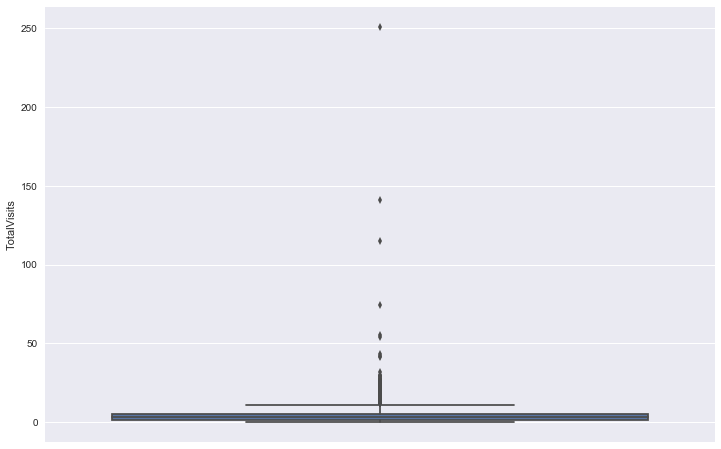

In [60]:
# Boxplot for all component to identify outliers
plt.figure(figsize=(12,8))
sns.boxplot(x = lead_score.TotalVisits , orient='v')
plt.show()

We can clearly see from above boxplot that outliers are present

In [61]:
# Removing outlier
TotalVisits=lead_score["TotalVisits"].quantile(.99)
len(lead_score.loc[(lead_score["TotalVisits"] > TotalVisits)])

83

##### Boxplot to identify outliers in 'TotTimeSpent' column

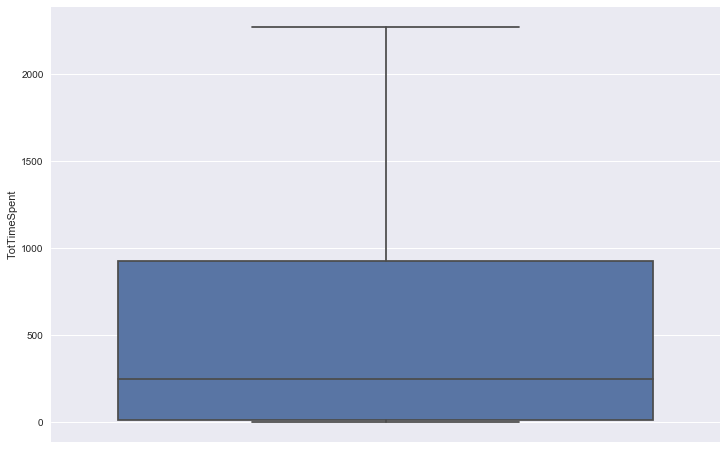

In [62]:
# Boxplot for all component to identify outliers
plt.figure(figsize=(12,8))
sns.boxplot(x = lead_score.TotTimeSpent , orient='v')
plt.show()

No outlier present in this variable

##### Boxplot to identify outliers in 'PageViewsPerVisit' column

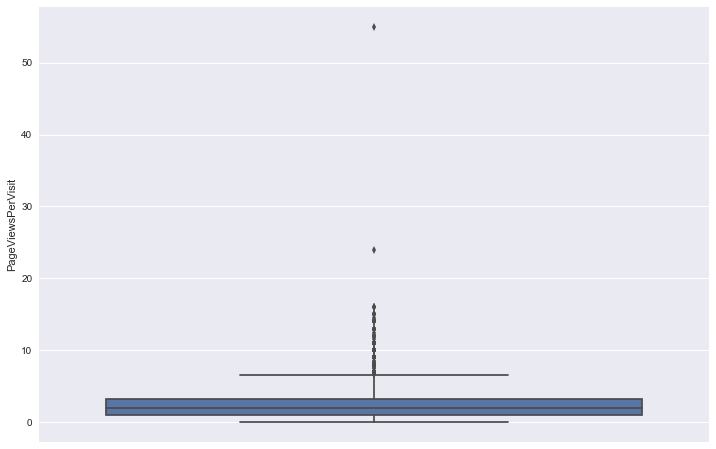

In [63]:
# Boxplot for all component to identify outliers
plt.figure(figsize=(12,8))
sns.boxplot(x = lead_score.PageViewsPerVisit , orient='v')
plt.show()

We can clearly see from above boxplot that outliers are present

In [64]:
PageViewsPerVisit=lead_score["PageViewsPerVisit"].quantile(.99)
len(lead_score.loc[(lead_score["PageViewsPerVisit"] > PageViewsPerVisit)])

75

In [65]:
lead_score = lead_score.loc[(lead_score["TotalVisits"] <= TotalVisits) & 
                            (lead_score["PageViewsPerVisit"] <= PageViewsPerVisit)]

In [66]:
# Dataframe after outlier removal
lead_score.shape

(8924, 64)

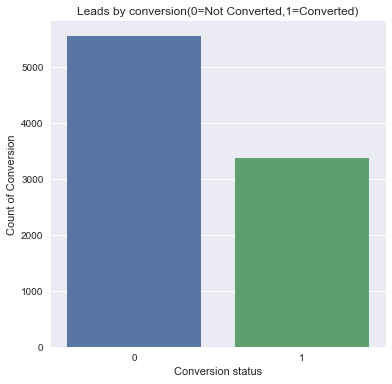

In [67]:
# Checking the converted and not converted leads in the data after the data cleaning and outlier removal
plt.figure(figsize=(6, 6))
sns.countplot(x="Converted", data=lead_score)
plt.title('Leads by conversion(0=Not Converted,1=Converted)')
plt.ylabel('Count of Conversion')
plt.xlabel('Conversion status')
plt.show()

In [68]:
# Lead conversion rate after outlier removal
Conversion_Rate = (sum(lead_score["Converted"])/len(lead_score["Converted"].index))*100
Conversion_Rate

37.75212909009413

## Step 4: Test-Train Split

In [69]:
# Importing libraries for test-train split
from sklearn.model_selection import train_test_split

In [70]:
# Putting feature variable to X
X = lead_score.drop(['Converted'], axis=1)
X.head()

,DoNotEmail,TotalVisits,TotTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Putting response variable to y
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [73]:
# Importing libraries for Standardization
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

X_train[['TotalVisits','TotTimeSpent','PageViewsPerVisit']] = scaler.fit_transform(X_train[['TotalVisits','TotTimeSpent',
                                                                                           'PageViewsPerVisit']])

X_train.head()

,DoNotEmail,TotalVisits,TotTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Facebook,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
6676,0,-0.049636,1.395668,0.395289,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6138,0,0.297929,0.609686,0.926758,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8650,0,-0.049636,1.178657,0.395289,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3423,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6552,0,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 6: Looking at Correlations

In [75]:
# Correlation matrix
corr = X_train.corr() 
cm = sns.light_palette("skyblue", as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

In [76]:
# Selecting only columns having correlation more than 0.70
rows, cols = X_train.shape
col = list(X_train.columns)

corr = X_train.corr().values

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] > 0.7:
            print(col[i], ' ', col[j], ' ', corr[i,j])

TotalVisits   PageViewsPerVisit   0.716905464936
LeadOrigin_Lead Add Form   LeadSource_Reference   0.869362310245
LeadOrigin_Lead Import   LeadSource_Facebook   0.9779407223
LastActivity_Email Link Clicked   LastNotableActivity_Email Link Clicked   0.812351562095
LastActivity_Email Marked Spam   LastNotableActivity_Email Marked Spam   1.0
LastActivity_Email Opened   LastNotableActivity_Email Opened   0.862736585441
LastActivity_Email Received   LastNotableActivity_Email Received   1.0
LastActivity_Resubscribed to emails   LastNotableActivity_Resubscribed to emails   1.0
LastActivity_SMS Sent   LastNotableActivity_SMS Sent   0.85965719933
LastActivity_Unsubscribed   LastNotableActivity_Unsubscribed   0.842181426977
LastActivity_View in browser link Clicked   LastNotableActivity_View in browser link Clicked   0.707050165086


In [77]:
# Removing Highly corelated variables
X_train.drop(['LeadSource_Reference','LeadSource_Facebook','LastNotableActivity_Email Link Clicked',
              'LastNotableActivity_Email Marked Spam','LastNotableActivity_Email Opened','LastNotableActivity_Email Received',
              'LastNotableActivity_Resubscribed to emails','LastNotableActivity_SMS Sent', 'LastNotableActivity_Unsubscribed',
              'LastNotableActivity_View in browser link Clicked'], axis=1, inplace=True)

X_test.drop(['LeadSource_Reference','LeadSource_Facebook','LastNotableActivity_Email Link Clicked',
              'LastNotableActivity_Email Marked Spam','LastNotableActivity_Email Opened','LastNotableActivity_Email Received',
              'LastNotableActivity_Resubscribed to emails','LastNotableActivity_SMS Sent', 'LastNotableActivity_Unsubscribed',
              'LastNotableActivity_View in browser link Clicked'], axis=1, inplace=True)

## Step 7: Model Building

#### <span style="color:blue">Method used</span>
- <span style="color:green">__For feature selection__</span> - We will be using <span style="color:red">__RFE(Recursive Feature Elimination) method__</span>
- <span style="color:green">__For model assessment with detailed statistics__</span> - We will be using <span style="color:red">__statsmodels.api__</span>

__Assumption__
During model building we will remove variable if its <span style="color:blue">__p value > 0.05 & VIF > 2__</span>

#### Running first model

In [78]:
# Importing library for statsmodels
import statsmodels.api as sm

# Importing library for calculating metrics
from sklearn import metrics

In [79]:
# Running Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6197
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2467.6
Date:                Sun, 03 Mar 2019   Deviance:                       4935.1
Time:                        17:29:42   Pearson chi2:                 6.29e+03
No. Iterations:                    24                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------
DoNotEmail                                       -1.3576      0.229     -5.922      0.000        -1.807    -0.908
TotalVisits                                       0.3422      0.054      6.395      0.000         0.237     0.447
TotTimeSpent                                      1.0958      0.042     26.186      0.000         1.014     1.178
PageViewsPerVisit                                -0.3028      0.059     -5.111      0.000        -0.419    -0.187
FreeCopy                                         -0.0499      0.112     -0.446      0.656        -0.269     0.169
LeadOrigin_Landing Page Submission               -0.1502      0.110     -1.363      0.173        -0.366     0.066
LeadOrigin_Lead Add Form                          3.7684      1.366      2.759      0.006         1.092     6.445
LeadOrigin_Lead Import                            1.1314      1.451      0.780      0.435        -1.712     3.975
LeadSource_Direct Traffic                         0.1152      1.366      0.084      0.933        -2.561     2.792
LeadSource_Google                                 0.4543      1.363      0.333      0.739        -2.217     3.126
LeadSource_Live Chat                             22.5988   2.16e+05      0.000      1.000     -4.23e+05  4.23e+05
LeadSource_NC_EDM                              1.003e-09   4.16e-05   2.41e-05      1.000     -8.15e-05  8.15e-05
LeadSource_Olark Chat                             1.4612      1.366      1.070      0.285        -1.216     4.138
LeadSource_Organic Search                         0.2826      1.366      0.207      0.836        -2.394     2.959
LeadSource_Pay per Click Ads                    -23.4664   2.16e+05     -0.000      1.000     -4.23e+05  4.23e+05
LeadSource_Press_Release                        -21.6498   2.16e+05     -0.000      1.000     -4.23e+05  4.23e+05
LeadSource_Referral Sites                         0.1198      1.404      0.085      0.932        -2.632     2.871
LeadSource_Social Media                       -8.769e-09   5.44e-05     -0.000      1.000        -0.000     0.000
LeadSource_WeLearn                               25.5076   2.16e+05      0.000      1.000     -4.23e+05  4.23e+05
LeadSource_Welingak Website                       1.7064      0.755      2.260      0.024         0.226     3.186
LeadSource_bing                                 -21.7877    1.5e+05     -0.000      1.000     -2.94e+05  2.94e+05
LeadSource_blog                                 -23.3789   2.16e+05     -0.000      1.000     -4.23e+05  4.23e+05
LeadSource_testone                              -23.4736   2.16e+05     -0.000      1.000     -4.23e+05  4.23e+05
LeadSource_welearnblog_Home                     -22.8454   2.16e+05     -0.000      1.000     -4.23e+05  4.23e+05
LeadSource_youtubechannel                     -1.779e-09   5.29e-05  -3.36e-05      

#### Feature selection using RFE

In [80]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [81]:
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True], dtype=bool)

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('DoNotEmail', True, 1),
 ('TotalVisits', True, 1),
 ('TotTimeSpent', True, 1),
 ('PageViewsPerVisit', True, 1),
 ('FreeCopy', False, 20),
 ('LeadOrigin_Landing Page Submission', False, 13),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 7),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_Live Chat', False, 18),
 ('LeadSource_NC_EDM', False, 21),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Pay per Click Ads', False, 5),
 ('LeadSource_Press_Release', False, 19),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Social Media', False, 23),
 ('LeadSource_WeLearn', False, 6),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 16),
 ('LeadSource_blog', False, 8),
 ('LeadSource_testone', False, 4),
 ('LeadSource_welearnblog_Home', False, 14),
 ('LeadSource_youtubechannel', False, 22),
 ('LastActivity_Converted to Lead', True, 1),
 ('LastActivity_Email B

In [84]:
# Selecting only those columns having ranking as 1
col = X_train.columns[rfe.support_]
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Marked Spam',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Resubscribed to emails', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotabl

#### Assessing the model with StatsModels

In [85]:
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6215
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2475.2
Date:                Sun, 03 Mar 2019   Deviance:                       4950.3
Time:                        17:29:45   Pearson chi2:                 6.27e+03
No. Iterations:                    24                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1043      1.707     -0.061      0.951        -3.450     3.241
DoNotEmail                                      -1.3599      0.226     -6.009      0.000        -1.803    -0.916
TotalVisits                                      0.3357      0.053      6.334      0.000         0.232     0.440
TotTimeSpent                                     1.0996      0.042     26.327      0.000         1.018     1.181
PageViewsPerVisit                               -0.3245      0.058     -5.640      0.000        -0.437    -0.212
LeadOrigin_Lead Add Form                         2.8209      0.475      5.939      0.000         1.890     3.752
LeadSource_Direct Traffic                       -0.9802      0.440     -2.228      0.026        -1.843    -0.118
LeadSource_Google                               -0.5526      0.439     -1.258      0.208        -1.413     0.308
LeadSource_Olark Chat                            0.5103      0.437      1.168      0.243        -0.346     1.366
LeadSource_Organic Search                       -0.7230      0.451     -1.603      0.109        -1.607     0.161
LeadSource_Referral Sites                       -0.8250      0.550     -1.500      0.134        -1.903     0.253
LeadSource_Welingak Website                      1.7084      0.755      2.264      0.024         0.229     3.187
LastActivity_Converted to Lead                  -0.6979      0.237     -2.951      0.003        -1.161    -0.234
LastActivity_Email Bounced                      -0.6033      0.431     -1.400      0.162        -1.448     0.241
LastActivity_Email Marked Spam                  25.0597   1.51e+05      0.000      1.000     -2.96e+05  2.96e+05
LastActivity_Had a Phone Conversation            2.4054      0.989      2.432      0.015         0.467     4.344
LastActivity_Olark Chat Conversation            -0.9867      0.206     -4.798      0.000        -1.390    -0.584
LastActivity_Resubscribed to emails             27.3467   2.16e+05      0.000      1.000     -4.23e+05  4.23e+05
LastActivity_SMS Sent                            1.3036      0.080     16.281      0.000         1.147     1.461
LastActivity_Unsubscribed                        0.8482      0.568      1.494      0.135        -0.265     1.961
LastActivity_View in browser link Clicked      -24.4066   1.52e+05     -0.000      1.000     -2.99e+05  2.99e+05
CurrentOccupation_Housewife                     25.8245   7.74e+04      0.000      1.000     -1.52e+05  1.52e+05
CurrentOccupation_Other                         -1.2432      1.653     -0.752      0.452        -4.483     1.996
CurrentOccupation_Student                       -0.0909      1.665     -0.055      0.956        -3.355     3.173
CurrentOccupation_Unemployed                    -0.0972      1.651     -0.059      0.953        -3.333     3.13

#### Checking VIFs

In [86]:
# Importing library for VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,CurrentOccupation_Unemployed,106.83
6,LeadSource_Google,58.30
21,CurrentOccupation_Other,53.71
5,LeadSource_Direct Traffic,49.78
7,LeadSource_Olark Chat,35.94
8,LeadSource_Organic Search,22.97
24,CurrentOccupation_Working Professional,13.91
4,LeadOrigin_Lead Add Form,12.12
22,CurrentOccupation_Student,5.00
9,LeadSource_Referral Sites,3.51


In [88]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [89]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [90]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.551830,1,6676,1
1,0.734836,1,6138,1
2,0.920502,1,8650,1
3,0.031934,0,3423,0
4,0.144225,0,6552,0


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.822446365674


#### <span style="color:blue">Dropping insignificant variable</span>
CurrentOccupation_Unemployed column has very high VIF so __dropping CurrentOccupation_Unemployed__ column

In [92]:
col = col.drop('CurrentOccupation_Unemployed', 1)
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Marked Spam',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Resubscribed to emails', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
   

In [93]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6216
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2475.2
Date:                Sun, 03 Mar 2019   Deviance:                       4950.3
Time:                        17:29:47   Pearson chi2:                 6.27e+03
No. Iterations:                    24                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
const                                           -0.2014      0.433     -0.465      0.642        -1.050     0.647
DoNotEmail                                      -1.3599      0.226     -6.009      0.000        -1.803    -0.916
TotalVisits                                      0.3357      0.053      6.335      0.000         0.232     0.440
TotTimeSpent                                     1.0996      0.042     26.328      0.000         1.018     1.181
PageViewsPerVisit                               -0.3245      0.058     -5.641      0.000        -0.437    -0.212
LeadOrigin_Lead Add Form                         2.8216      0.475      5.943      0.000         1.891     3.752
LeadSource_Direct Traffic                       -0.9801      0.440     -2.228      0.026        -1.843    -0.118
LeadSource_Google                               -0.5526      0.439     -1.258      0.208        -1.413     0.308
LeadSource_Olark Chat                            0.5103      0.437      1.168      0.243        -0.346     1.366
LeadSource_Organic Search                       -0.7230      0.451     -1.603      0.109        -1.607     0.161
LeadSource_Referral Sites                       -0.8250      0.550     -1.500      0.134        -1.903     0.253
LeadSource_Welingak Website                      1.7076      0.754      2.263      0.024         0.229     3.186
LastActivity_Converted to Lead                  -0.6982      0.236     -2.952      0.003        -1.162    -0.235
LastActivity_Email Bounced                      -0.6034      0.431     -1.400      0.161        -1.448     0.241
LastActivity_Email Marked Spam                  25.0593   1.51e+05      0.000      1.000     -2.96e+05  2.96e+05
LastActivity_Had a Phone Conversation            2.4052      0.989      2.432      0.015         0.467     4.343
LastActivity_Olark Chat Conversation            -0.9869      0.206     -4.799      0.000        -1.390    -0.584
LastActivity_Resubscribed to emails             27.3467   2.16e+05      0.000      1.000     -4.23e+05  4.23e+05
LastActivity_SMS Sent                            1.3035      0.080     16.282      0.000         1.147     1.460
LastActivity_Unsubscribed                        0.8482      0.568      1.494      0.135        -0.265     1.961
LastActivity_View in browser link Clicked      -24.4067   1.52e+05     -0.000      1.000     -2.99e+05  2.99e+05
CurrentOccupation_Housewife                     25.9215   7.74e+04      0.000      1.000     -1.52e+05  1.52e+05
CurrentOccupation_Other                         -1.1461      0.090    -12.800      0.000        -1.322    -0.971
CurrentOccupation_Student                        0.0062      0.231      0.027      0.979        -0.446     0.459
CurrentOccupation_Working Professional           2.4797      0.190     13.054      0.000         2.107     2.85

##### Let's check the VIFs again

In [94]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
25,LastNotableActivity_Modified,2.46
1,TotalVisits,2.42
7,LeadSource_Olark Chat,2.32
0,DoNotEmail,2.17
15,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.02
6,LeadSource_Google,1.88
17,LastActivity_SMS Sent,1.74
4,LeadOrigin_Lead Add Form,1.73


In [95]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [96]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [97]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.822446365674


So overall the accuracy hasn't dropped.

#### <span style="color:blue">Dropping insignificant variable</span>
'LastActivity_Email Marked Spam' column has p > 0.05 so __dropping 'LastActivity_Email Marked Spam' column__

In [99]:
col = col.drop('LastActivity_Email Marked Spam')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Resubscribed to emails', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
 

In [100]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6217
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2476.1
Date:                Sun, 03 Mar 2019   Deviance:                       4952.2
Time:                        17:29:49   Pearson chi2:                 6.28e+03
No. Iterations:                    24                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1983      0.433     -0.458      0.647        -1.047     0.650
DoNotEmail                                      -1.3237      0.223     -5.940      0.000        -1.761    -0.887
TotalVisits                                      0.3369      0.053      6.361      0.000         0.233     0.441
TotTimeSpent                                     1.1005      0.042     26.365      0.000         1.019     1.182
PageViewsPerVisit                               -0.3255      0.058     -5.660      0.000        -0.438    -0.213
LeadOrigin_Lead Add Form                         2.8386      0.475      5.977      0.000         1.908     3.769
LeadSource_Direct Traffic                       -0.9814      0.440     -2.231      0.026        -1.844    -0.119
LeadSource_Google                               -0.5548      0.439     -1.263      0.207        -1.416     0.306
LeadSource_Olark Chat                            0.5093      0.437      1.166      0.244        -0.347     1.365
LeadSource_Organic Search                       -0.7254      0.451     -1.609      0.108        -1.609     0.158
LeadSource_Referral Sites                       -0.8269      0.550     -1.503      0.133        -1.905     0.251
LeadSource_Welingak Website                      1.6854      0.754      2.234      0.025         0.207     3.164
LastActivity_Converted to Lead                  -0.6974      0.236     -2.949      0.003        -1.161    -0.234
LastActivity_Email Bounced                      -0.6364      0.430     -1.481      0.139        -1.478     0.206
LastActivity_Had a Phone Conversation            2.3998      0.987      2.432      0.015         0.466     4.334
LastActivity_Olark Chat Conversation            -0.9865      0.206     -4.797      0.000        -1.390    -0.583
LastActivity_Resubscribed to emails             27.3460   2.16e+05      0.000      1.000     -4.23e+05  4.23e+05
LastActivity_SMS Sent                            1.3003      0.080     16.252      0.000         1.143     1.457
LastActivity_Unsubscribed                        0.8126      0.567      1.434      0.152        -0.298     1.923
LastActivity_View in browser link Clicked      -24.4074   1.52e+05     -0.000      1.000     -2.99e+05  2.99e+05
CurrentOccupation_Housewife                     25.9199   7.74e+04      0.000      1.000     -1.52e+05  1.52e+05
CurrentOccupation_Other                         -1.1465      0.090    -12.806      0.000        -1.322    -0.971
CurrentOccupation_Student                        0.0046      0.231      0.020      0.984        -0.448     0.457
CurrentOccupation_Working Professional           2.4787      0.190     13.047      0.000         2.106     2.851
LastNotableActivity_Had a Phone Conversation    23.8866   7.65e+04      0.000      1.000      -1.5e+05   1.5e+0

##### Let's now check the VIFs again

In [101]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
24,LastNotableActivity_Modified,2.46
1,TotalVisits,2.42
7,LeadSource_Olark Chat,2.32
0,DoNotEmail,2.15
14,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.01
6,LeadSource_Google,1.88
16,LastActivity_SMS Sent,1.74
4,LeadOrigin_Lead Add Form,1.72


In [102]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [103]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [104]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.82260646814


The accuracy is still practically the same.

#### <span style="color:blue">Dropping insignificant variable</span>
'LastActivity_Resubscribed to emails' column has p > 0.05 so __dropping 'LastActivity_Resubscribed to emails' column__

In [106]:
col = col.drop('LastActivity_Resubscribed to emails')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [107]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6218
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2478.0
Date:                Sun, 03 Mar 2019   Deviance:                       4956.1
Time:                        17:29:51   Pearson chi2:                 6.28e+03
No. Iterations:                    23                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1980      0.433     -0.458      0.647        -1.046     0.650
DoNotEmail                                      -1.3233      0.223     -5.939      0.000        -1.760    -0.887
TotalVisits                                      0.3365      0.053      6.356      0.000         0.233     0.440
TotTimeSpent                                     1.1001      0.042     26.363      0.000         1.018     1.182
PageViewsPerVisit                               -0.3255      0.057     -5.660      0.000        -0.438    -0.213
LeadOrigin_Lead Add Form                         2.8389      0.475      5.978      0.000         1.908     3.770
LeadSource_Direct Traffic                       -0.9810      0.440     -2.230      0.026        -1.843    -0.119
LeadSource_Google                               -0.5544      0.439     -1.263      0.207        -1.415     0.306
LeadSource_Olark Chat                            0.5142      0.437      1.178      0.239        -0.342     1.370
LeadSource_Organic Search                       -0.7247      0.451     -1.608      0.108        -1.608     0.159
LeadSource_Referral Sites                       -0.8266      0.550     -1.503      0.133        -1.905     0.251
LeadSource_Welingak Website                      1.6859      0.754      2.235      0.025         0.207     3.165
LastActivity_Converted to Lead                  -0.6970      0.236     -2.948      0.003        -1.160    -0.234
LastActivity_Email Bounced                      -0.6380      0.430     -1.485      0.137        -1.480     0.204
LastActivity_Had a Phone Conversation            2.3996      0.987      2.432      0.015         0.466     4.334
LastActivity_Olark Chat Conversation            -0.9901      0.206     -4.816      0.000        -1.393    -0.587
LastActivity_SMS Sent                            1.2981      0.080     16.231      0.000         1.141     1.455
LastActivity_Unsubscribed                        0.8099      0.567      1.429      0.153        -0.301     1.921
LastActivity_View in browser link Clicked      -23.4095   9.25e+04     -0.000      1.000     -1.81e+05  1.81e+05
CurrentOccupation_Housewife                     24.9195    4.7e+04      0.001      1.000      -9.2e+04  9.21e+04
CurrentOccupation_Other                         -1.1416      0.089    -12.768      0.000        -1.317    -0.966
CurrentOccupation_Student                        0.0039      0.231      0.017      0.987        -0.449     0.457
CurrentOccupation_Working Professional           2.4788      0.190     13.048      0.000         2.106     2.851
LastNotableActivity_Had a Phone Conversation    22.8861   4.64e+04      0.000      1.000     -9.09e+04  9.09e+04
LastNotableActivity_Modified                    -0.6479      0.092     -7.049      0.000        -0.828    -0.46

##### Let's now check the VIFs again

In [108]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
23,LastNotableActivity_Modified,2.46
1,TotalVisits,2.42
7,LeadSource_Olark Chat,2.32
0,DoNotEmail,2.15
14,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.01
6,LeadSource_Google,1.88
15,LastActivity_SMS Sent,1.74
4,LeadOrigin_Lead Add Form,1.72


In [109]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [110]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [111]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.822446365674


#### <span style="color:blue">Dropping insignificant variable</span>
'LastActivity_View in browser link Clicked' column has p > 0.05 so __LastActivity_View in browser link Clicked' column__

In [113]:
col = col.drop('LastActivity_View in browser link Clicked')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed', 'CurrentOccupation_Housewife',
       'CurrentOccupation_Other', 'CurrentOccupation_Student',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [114]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6219
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2478.6
Date:                Sun, 03 Mar 2019   Deviance:                       4957.2
Time:                        17:29:53   Pearson chi2:                 6.28e+03
No. Iterations:                    23                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1982      0.433     -0.458      0.647        -1.046     0.650
DoNotEmail                                      -1.3234      0.223     -5.939      0.000        -1.760    -0.887
TotalVisits                                      0.3356      0.053      6.340      0.000         0.232     0.439
TotTimeSpent                                     1.1007      0.042     26.378      0.000         1.019     1.183
PageViewsPerVisit                               -0.3248      0.057     -5.650      0.000        -0.437    -0.212
LeadOrigin_Lead Add Form                         2.8393      0.475      5.979      0.000         1.908     3.770
LeadSource_Direct Traffic                       -0.9816      0.440     -2.231      0.026        -1.844    -0.119
LeadSource_Google                               -0.5559      0.439     -1.266      0.206        -1.417     0.305
LeadSource_Olark Chat                            0.5124      0.437      1.174      0.241        -0.343     1.368
LeadSource_Organic Search                       -0.7251      0.451     -1.608      0.108        -1.609     0.158
LeadSource_Referral Sites                       -0.8268      0.550     -1.503      0.133        -1.905     0.251
LeadSource_Welingak Website                      1.6858      0.754      2.234      0.025         0.207     3.164
LastActivity_Converted to Lead                  -0.6958      0.236     -2.942      0.003        -1.159    -0.232
LastActivity_Email Bounced                      -0.6369      0.430     -1.482      0.138        -1.479     0.205
LastActivity_Had a Phone Conversation            2.4008      0.987      2.433      0.015         0.466     4.335
LastActivity_Olark Chat Conversation            -0.9877      0.206     -4.805      0.000        -1.391    -0.585
LastActivity_SMS Sent                            1.2991      0.080     16.244      0.000         1.142     1.456
LastActivity_Unsubscribed                        0.8107      0.567      1.430      0.153        -0.300     1.922
CurrentOccupation_Housewife                     24.9206    4.7e+04      0.001      1.000      -9.2e+04   9.2e+04
CurrentOccupation_Other                         -1.1406      0.089    -12.757      0.000        -1.316    -0.965
CurrentOccupation_Student                        0.0048      0.231      0.021      0.984        -0.448     0.458
CurrentOccupation_Working Professional           2.4796      0.190     13.051      0.000         2.107     2.852
LastNotableActivity_Had a Phone Conversation    22.8863   4.64e+04      0.000      1.000     -9.09e+04  9.09e+04
LastNotableActivity_Modified                    -0.6490      0.092     -7.062      0.000        -0.829    -0.469
LastNotableActivity_Olark Chat Conversation     -0.5613      0.384     -1.462      0.144        -1.314     0.19

##### Let's now check the VIFs again

In [115]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
22,LastNotableActivity_Modified,2.46
1,TotalVisits,2.42
7,LeadSource_Olark Chat,2.32
0,DoNotEmail,2.15
14,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.01
6,LeadSource_Google,1.88
15,LastActivity_SMS Sent,1.74
4,LeadOrigin_Lead Add Form,1.72


In [116]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [117]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [118]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [119]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.822446365674


#### <span style="color:blue">Dropping insignificant variable</span>
'CurrentOccupation_Housewife' column has p > 0.05 so __dropping 'CurrentOccupation_Housewife' column__

In [120]:
col = col.drop('CurrentOccupation_Housewife')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [121]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6220
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2483.6
Date:                Sun, 03 Mar 2019   Deviance:                       4967.1
Time:                        17:29:55   Pearson chi2:                 6.29e+03
No. Iterations:                    23                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------------
const                                           -0.1984      0.433     -0.459      0.647        -1.046     0.649
DoNotEmail                                      -1.3246      0.223     -5.946      0.000        -1.761    -0.888
TotalVisits                                      0.3334      0.053      6.303      0.000         0.230     0.437
TotTimeSpent                                     1.1004      0.042     26.399      0.000         1.019     1.182
PageViewsPerVisit                               -0.3271      0.057     -5.694      0.000        -0.440    -0.214
LeadOrigin_Lead Add Form                         2.8473      0.475      5.997      0.000         1.917     3.778
LeadSource_Direct Traffic                       -0.9725      0.440     -2.211      0.027        -1.834    -0.111
LeadSource_Google                               -0.5463      0.439     -1.244      0.213        -1.407     0.314
LeadSource_Olark Chat                            0.5121      0.437      1.173      0.241        -0.343     1.368
LeadSource_Organic Search                       -0.7059      0.451     -1.567      0.117        -1.589     0.177
LeadSource_Referral Sites                       -0.8204      0.550     -1.492      0.136        -1.898     0.257
LeadSource_Welingak Website                      1.6754      0.754      2.221      0.026         0.197     3.154
LastActivity_Converted to Lead                  -0.7087      0.236     -2.999      0.003        -1.172    -0.245
LastActivity_Email Bounced                      -0.6452      0.429     -1.502      0.133        -1.487     0.197
LastActivity_Had a Phone Conversation            2.3840      0.987      2.415      0.016         0.450     4.318
LastActivity_Olark Chat Conversation            -0.9948      0.206     -4.841      0.000        -1.398    -0.592
LastActivity_SMS Sent                            1.2916      0.080     16.167      0.000         1.135     1.448
LastActivity_Unsubscribed                        0.8038      0.567      1.418      0.156        -0.307     1.915
CurrentOccupation_Other                         -1.1449      0.089    -12.812      0.000        -1.320    -0.970
CurrentOccupation_Student                       -0.0012      0.231     -0.005      0.996        -0.454     0.452
CurrentOccupation_Working Professional           2.4740      0.190     13.023      0.000         2.102     2.846
LastNotableActivity_Had a Phone Conversation    22.8973   4.64e+04      0.000      1.000     -9.08e+04  9.09e+04
LastNotableActivity_Modified                    -0.6466      0.092     -7.049      0.000        -0.826    -0.467
LastNotableActivity_Olark Chat Conversation     -0.5576      0.384     -1.453      0.146        -1.310     0.195
LastNotableActivity_Page Visited on Website     -0.6625      0.214     -3.090      0.002        -1.083    -0.24

##### Let's now check the VIFs again

In [122]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
21,LastNotableActivity_Modified,2.46
1,TotalVisits,2.42
7,LeadSource_Olark Chat,2.32
0,DoNotEmail,2.15
14,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.01
6,LeadSource_Google,1.88
15,LastActivity_SMS Sent,1.73
4,LeadOrigin_Lead Add Form,1.72


In [123]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [124]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [125]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.822126160743


#### <span style="color:blue">Dropping insignificant variable</span>
'LastNotableActivity_Had a Phone Conversation' column has p > 0.05 so __dropping 'LastNotableActivity_Had a Phone Conversation' column__

In [127]:
col = col.drop('LastNotableActivity_Had a Phone Conversation')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed', 'CurrentOccupation_Other',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [128]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6221
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2484.5
Date:                Sun, 03 Mar 2019   Deviance:                       4968.9
Time:                        17:29:56   Pearson chi2:                 6.29e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                          -0.1951      0.433     -0.451      0.652        -1.043     0.653
DoNotEmail                                     -1.3314      0.223     -5.976      0.000        -1.768    -0.895
TotalVisits                                     0.3337      0.053      6.309      0.000         0.230     0.437
TotTimeSpent                                    1.0998      0.042     26.390      0.000         1.018     1.181
PageViewsPerVisit                              -0.3248      0.057     -5.661      0.000        -0.437    -0.212
LeadOrigin_Lead Add Form                        2.8480      0.475      5.998      0.000         1.917     3.779
LeadSource_Direct Traffic                      -0.9751      0.440     -2.217      0.027        -1.837    -0.113
LeadSource_Google                              -0.5472      0.439     -1.246      0.213        -1.408     0.313
LeadSource_Olark Chat                           0.5123      0.437      1.174      0.241        -0.343     1.368
LeadSource_Organic Search                      -0.7141      0.451     -1.585      0.113        -1.597     0.169
LeadSource_Referral Sites                      -0.8259      0.550     -1.501      0.133        -1.904     0.252
LeadSource_Welingak Website                     1.6767      0.754      2.223      0.026         0.198     3.155
LastActivity_Converted to Lead                 -0.7026      0.236     -2.974      0.003        -1.166    -0.239
LastActivity_Email Bounced                     -0.6356      0.429     -1.480      0.139        -1.477     0.206
LastActivity_Had a Phone Conversation           3.0516      0.866      3.524      0.000         1.355     4.749
LastActivity_Olark Chat Conversation           -0.9903      0.205     -4.819      0.000        -1.393    -0.588
LastActivity_SMS Sent                           1.2917      0.080     16.167      0.000         1.135     1.448
LastActivity_Unsubscribed                       0.8116      0.567      1.432      0.152        -0.299     1.922
CurrentOccupation_Other                        -1.1455      0.089    -12.816      0.000        -1.321    -0.970
CurrentOccupation_Student                      -0.0013      0.231     -0.006      0.995        -0.454     0.451
CurrentOccupation_Working Professional          2.4729      0.190     13.016      0.000         2.101     2.845
LastNotableActivity_Modified                   -0.6517      0.092     -7.110      0.000        -0.831    -0.472
LastNotableActivity_Olark Chat Conversation    -0.5627      0.384     -1.466      0.143        -1.315     0.190
LastNotableActivity_Page Visited on Website    -0.6634      0.214     -3.094      0.002        -1.084    -0.243
LastNotableActivity_Unreachable                 1.7762      0.596      2.981      0.003         0.608     2.944
==========================

##### Let's now check the VIFs again

In [129]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
20,LastNotableActivity_Modified,2.45
1,TotalVisits,2.42
7,LeadSource_Olark Chat,2.32
0,DoNotEmail,2.15
14,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.01
6,LeadSource_Google,1.88
15,LastActivity_SMS Sent,1.73
4,LeadOrigin_Lead Add Form,1.72


In [130]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [131]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [132]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [133]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.821966058277


#### <span style="color:blue">Dropping insignificant variable</span>
'CurrentOccupation_Student' column has p > 0.05 so __dropping 'CurrentOccupation_Student' column__

In [134]:
col = col.drop('CurrentOccupation_Student')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed', 'CurrentOccupation_Other',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [135]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6222
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2484.5
Date:                Sun, 03 Mar 2019   Deviance:                       4968.9
Time:                        17:29:58   Pearson chi2:                 6.29e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                          -0.1952      0.432     -0.451      0.652        -1.043     0.652
DoNotEmail                                     -1.3314      0.223     -5.977      0.000        -1.768    -0.895
TotalVisits                                     0.3337      0.053      6.312      0.000         0.230     0.437
TotTimeSpent                                    1.0998      0.042     26.391      0.000         1.018     1.181
PageViewsPerVisit                              -0.3248      0.057     -5.661      0.000        -0.437    -0.212
LeadOrigin_Lead Add Form                        2.8480      0.475      5.998      0.000         1.917     3.779
LeadSource_Direct Traffic                      -0.9751      0.440     -2.217      0.027        -1.837    -0.113
LeadSource_Google                              -0.5471      0.439     -1.246      0.213        -1.408     0.313
LeadSource_Olark Chat                           0.5123      0.437      1.174      0.241        -0.343     1.368
LeadSource_Organic Search                      -0.7141      0.451     -1.585      0.113        -1.597     0.169
LeadSource_Referral Sites                      -0.8259      0.550     -1.501      0.133        -1.904     0.252
LeadSource_Welingak Website                     1.6768      0.754      2.223      0.026         0.198     3.155
LastActivity_Converted to Lead                 -0.7026      0.236     -2.974      0.003        -1.166    -0.239
LastActivity_Email Bounced                     -0.6356      0.429     -1.481      0.139        -1.477     0.205
LastActivity_Had a Phone Conversation           3.0516      0.866      3.524      0.000         1.355     4.749
LastActivity_Olark Chat Conversation           -0.9903      0.205     -4.820      0.000        -1.393    -0.588
LastActivity_SMS Sent                           1.2918      0.080     16.187      0.000         1.135     1.448
LastActivity_Unsubscribed                       0.8116      0.567      1.432      0.152        -0.299     1.922
CurrentOccupation_Other                        -1.1455      0.089    -12.864      0.000        -1.320    -0.971
CurrentOccupation_Working Professional          2.4730      0.190     13.030      0.000         2.101     2.845
LastNotableActivity_Modified                   -0.6517      0.092     -7.110      0.000        -0.831    -0.472
LastNotableActivity_Olark Chat Conversation    -0.5628      0.384     -1.467      0.142        -1.315     0.189
LastNotableActivity_Page Visited on Website    -0.6634      0.214     -3.094      0.002        -1.084    -0.243
LastNotableActivity_Unreachable                 1.7762      0.596      2.981      0.003         0.608     2.944
===============================================================================================================
"""

##### Let's now check the VIFs again

In [136]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.73
19,LastNotableActivity_Modified,2.45
1,TotalVisits,2.41
7,LeadSource_Olark Chat,2.30
0,DoNotEmail,2.15
14,LastActivity_Olark Chat Conversation,2.11
12,LastActivity_Email Bounced,2.00
6,LeadSource_Google,1.86
15,LastActivity_SMS Sent,1.73
4,LeadOrigin_Lead Add Form,1.71


In [137]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [138]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [139]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.821966058277


#### <span style="color:blue">Dropping insignificant variable</span>
'LeadSource_Olark Chat' column has p > 0.05 so __dropping 'LeadSource_Olark Chat' column__

In [141]:
col = col.drop('LeadSource_Olark Chat')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'LastActivity_Unsubscribed', 'CurrentOccupation_Other',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [142]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6223
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2485.2
Date:                Sun, 03 Mar 2019   Deviance:                       4970.4
Time:                        17:30:00   Pearson chi2:                 6.29e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                           0.2929      0.113      2.595      0.009         0.072     0.514
DoNotEmail                                     -1.3314      0.223     -5.979      0.000        -1.768    -0.895
TotalVisits                                     0.3335      0.053      6.310      0.000         0.230     0.437
TotTimeSpent                                    1.0992      0.042     26.389      0.000         1.018     1.181
PageViewsPerVisit                              -0.3270      0.057     -5.704      0.000        -0.439    -0.215
LeadOrigin_Lead Add Form                        2.3647      0.232     10.175      0.000         1.909     2.820
LeadSource_Direct Traffic                      -1.4627      0.140    -10.473      0.000        -1.736    -1.189
LeadSource_Google                              -1.0345      0.138     -7.508      0.000        -1.305    -0.764
LeadSource_Organic Search                      -1.2008      0.172     -6.971      0.000        -1.538    -0.863
LeadSource_Referral Sites                      -1.3136      0.359     -3.664      0.000        -2.016    -0.611
LeadSource_Welingak Website                     1.6688      0.754      2.212      0.027         0.190     3.147
LastActivity_Converted to Lead                 -0.7019      0.236     -2.972      0.003        -1.165    -0.239
LastActivity_Email Bounced                     -0.6309      0.429     -1.470      0.141        -1.472     0.210
LastActivity_Had a Phone Conversation           3.0533      0.866      3.526      0.000         1.356     4.750
LastActivity_Olark Chat Conversation           -0.9753      0.205     -4.754      0.000        -1.377    -0.573
LastActivity_SMS Sent                           1.2928      0.080     16.205      0.000         1.136     1.449
LastActivity_Unsubscribed                       0.8139      0.567      1.437      0.151        -0.296     1.924
CurrentOccupation_Other                        -1.1415      0.089    -12.831      0.000        -1.316    -0.967
CurrentOccupation_Working Professional          2.4729      0.190     13.028      0.000         2.101     2.845
LastNotableActivity_Modified                   -0.6547      0.092     -7.147      0.000        -0.834    -0.475
LastNotableActivity_Olark Chat Conversation    -0.5674      0.384     -1.478      0.140        -1.320     0.185
LastNotableActivity_Page Visited on Website    -0.6652      0.214     -3.103      0.002        -1.085    -0.245
LastNotableActivity_Unreachable                 1.7751      0.596      2.980      0.003         0.607     2.943
===============================================================================================================
"""

##### Let's now check the VIFs again

In [143]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.49
18,LastNotableActivity_Modified,2.40
1,TotalVisits,2.37
0,DoNotEmail,2.15
13,LastActivity_Olark Chat Conversation,2.00
11,LastActivity_Email Bounced,2.00
6,LeadSource_Google,1.84
5,LeadSource_Direct Traffic,1.65
14,LastActivity_SMS Sent,1.61
4,LeadOrigin_Lead Add Form,1.58


In [144]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [145]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [146]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.554408,1,6676,1
1,0.734518,1,6138,1
2,0.920772,1,8650,1
3,0.031791,0,3423,0
4,0.143527,0,6552,0


In [147]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.821485750881


#### <span style="color:blue">Dropping insignificant variable</span>
'LastActivity_Unsubscribed' column has p > 0.05 so __dropping 'LastActivity_Unsubscribed' column__

In [148]:
col = col.drop('LastActivity_Unsubscribed')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [149]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6224
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2486.1
Date:                Sun, 03 Mar 2019   Deviance:                       4972.3
Time:                        17:30:02   Pearson chi2:                 6.32e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                           0.2951      0.113      2.616      0.009         0.074     0.516
DoNotEmail                                     -1.2308      0.209     -5.890      0.000        -1.640    -0.821
TotalVisits                                     0.3328      0.053      6.296      0.000         0.229     0.436
TotTimeSpent                                    1.0990      0.042     26.393      0.000         1.017     1.181
PageViewsPerVisit                              -0.3277      0.057     -5.718      0.000        -0.440    -0.215
LeadOrigin_Lead Add Form                        2.3592      0.232     10.160      0.000         1.904     2.814
LeadSource_Direct Traffic                      -1.4604      0.140    -10.461      0.000        -1.734    -1.187
LeadSource_Google                              -1.0323      0.138     -7.495      0.000        -1.302    -0.762
LeadSource_Organic Search                      -1.1943      0.172     -6.939      0.000        -1.532    -0.857
LeadSource_Referral Sites                      -1.2939      0.359     -3.606      0.000        -1.997    -0.591
LeadSource_Welingak Website                     1.6614      0.754      2.203      0.028         0.183     3.139
LastActivity_Converted to Lead                 -0.7078      0.236     -2.997      0.003        -1.171    -0.245
LastActivity_Email Bounced                     -0.7274      0.423     -1.719      0.086        -1.557     0.102
LastActivity_Had a Phone Conversation           3.0302      0.860      3.522      0.000         1.344     4.717
LastActivity_Olark Chat Conversation           -0.9806      0.205     -4.782      0.000        -1.382    -0.579
LastActivity_SMS Sent                           1.2822      0.079     16.157      0.000         1.127     1.438
CurrentOccupation_Other                        -1.1390      0.089    -12.810      0.000        -1.313    -0.965
CurrentOccupation_Working Professional          2.4745      0.190     13.045      0.000         2.103     2.846
LastNotableActivity_Modified                   -0.6555      0.092     -7.157      0.000        -0.835    -0.476
LastNotableActivity_Olark Chat Conversation    -0.5695      0.384     -1.483      0.138        -1.322     0.183
LastNotableActivity_Page Visited on Website    -0.6758      0.214     -3.157      0.002        -1.095    -0.256
LastNotableActivity_Unreachable                 1.7699      0.596      2.971      0.003         0.603     2.937
===============================================================================================================
"""

##### Let's now check the VIFs again

In [150]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.49
17,LastNotableActivity_Modified,2.40
1,TotalVisits,2.37
13,LastActivity_Olark Chat Conversation,1.99
0,DoNotEmail,1.88
11,LastActivity_Email Bounced,1.88
6,LeadSource_Google,1.83
5,LeadSource_Direct Traffic,1.65
14,LastActivity_SMS Sent,1.59
4,LeadOrigin_Lead Add Form,1.58


In [151]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [152]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [153]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.555402,1,6676,1
1,0.733118,1,6138,1
2,0.921179,1,8650,1
3,0.031803,0,3423,0
4,0.144329,0,6552,0


In [154]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.821165545949


#### <span style="color:blue">Dropping insignificant variable</span>
'LastNotableActivity_Olark Chat Conversation' column has p > 0.05 so __dropping 'LastNotableActivity_Olark Chat Conversation' column__

In [155]:
col = col.drop('LastNotableActivity_Olark Chat Conversation')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [156]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6225
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2487.3
Date:                Sun, 03 Mar 2019   Deviance:                       4974.5
Time:                        17:30:04   Pearson chi2:                 6.34e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                           0.2866      0.113      2.545      0.011         0.066     0.507
DoNotEmail                                     -1.2339      0.209     -5.916      0.000        -1.643    -0.825
TotalVisits                                     0.3288      0.053      6.232      0.000         0.225     0.432
TotTimeSpent                                    1.0958      0.042     26.387      0.000         1.014     1.177
PageViewsPerVisit                              -0.3258      0.057     -5.690      0.000        -0.438    -0.214
LeadOrigin_Lead Add Form                        2.3516      0.232     10.130      0.000         1.897     2.807
LeadSource_Direct Traffic                      -1.4571      0.139    -10.446      0.000        -1.730    -1.184
LeadSource_Google                              -1.0306      0.138     -7.487      0.000        -1.300    -0.761
LeadSource_Organic Search                      -1.1904      0.172     -6.921      0.000        -1.528    -0.853
LeadSource_Referral Sites                      -1.2925      0.359     -3.603      0.000        -1.995    -0.589
LeadSource_Welingak Website                     1.6393      0.753      2.178      0.029         0.164     3.114
LastActivity_Converted to Lead                 -0.7357      0.235     -3.128      0.002        -1.197    -0.275
LastActivity_Email Bounced                     -0.7370      0.423     -1.744      0.081        -1.565     0.091
LastActivity_Had a Phone Conversation           3.0149      0.859      3.508      0.000         1.331     4.699
LastActivity_Olark Chat Conversation           -1.1505      0.177     -6.501      0.000        -1.497    -0.804
LastActivity_SMS Sent                           1.2830      0.079     16.185      0.000         1.128     1.438
CurrentOccupation_Other                        -1.1420      0.089    -12.850      0.000        -1.316    -0.968
CurrentOccupation_Working Professional          2.4765      0.190     13.042      0.000         2.104     2.849
LastNotableActivity_Modified                   -0.6209      0.088     -7.031      0.000        -0.794    -0.448
LastNotableActivity_Page Visited on Website    -0.6623      0.214     -3.099      0.002        -1.081    -0.243
LastNotableActivity_Unreachable                 1.7781      0.595      2.986      0.003         0.611     2.945
===============================================================================================================
"""

##### Let's now check the VIFs again

In [157]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.49
1,TotalVisits,2.37
17,LastNotableActivity_Modified,2.15
0,DoNotEmail,1.88
11,LastActivity_Email Bounced,1.87
6,LeadSource_Google,1.82
5,LeadSource_Direct Traffic,1.64
14,LastActivity_SMS Sent,1.59
4,LeadOrigin_Lead Add Form,1.58
7,LeadSource_Organic Search,1.53


In [158]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [159]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [160]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.553246,1,6676,1
1,0.731663,1,6138,1
2,0.920741,1,8650,1
3,0.027707,0,3423,0
4,0.143490,0,6552,0


In [161]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.821485750881


#### <span style="color:blue">Dropping insignificant variable</span>
'LastActivity_Email Bounced' column has p > 0.05 so __dropping 'LastActivity_Email Bounced' column__

In [162]:
col = col.drop('LastActivity_Email Bounced')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'PageViewsPerVisit',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [163]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2488.9
Date:                Sun, 03 Mar 2019   Deviance:                       4977.9
Time:                        17:30:05   Pearson chi2:                 6.35e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                           0.2860      0.113      2.539      0.011         0.065     0.507
DoNotEmail                                     -1.4225      0.183     -7.755      0.000        -1.782    -1.063
TotalVisits                                     0.3315      0.053      6.278      0.000         0.228     0.435
TotTimeSpent                                    1.0955      0.042     26.397      0.000         1.014     1.177
PageViewsPerVisit                              -0.3212      0.057     -5.612      0.000        -0.433    -0.209
LeadOrigin_Lead Add Form                        2.3703      0.232     10.206      0.000         1.915     2.825
LeadSource_Direct Traffic                      -1.4642      0.139    -10.504      0.000        -1.737    -1.191
LeadSource_Google                              -1.0384      0.138     -7.545      0.000        -1.308    -0.769
LeadSource_Organic Search                      -1.2043      0.172     -7.007      0.000        -1.541    -0.867
LeadSource_Referral Sites                      -1.2970      0.359     -3.612      0.000        -2.001    -0.593
LeadSource_Welingak Website                     1.6523      0.753      2.194      0.028         0.176     3.128
LastActivity_Converted to Lead                 -0.7102      0.235     -3.026      0.002        -1.170    -0.250
LastActivity_Had a Phone Conversation           3.0629      0.870      3.522      0.000         1.358     4.767
LastActivity_Olark Chat Conversation           -1.1308      0.177     -6.399      0.000        -1.477    -0.784
LastActivity_SMS Sent                           1.3024      0.079     16.556      0.000         1.148     1.457
CurrentOccupation_Other                        -1.1415      0.089    -12.841      0.000        -1.316    -0.967
CurrentOccupation_Working Professional          2.4664      0.189     13.051      0.000         2.096     2.837
LastNotableActivity_Modified                   -0.6340      0.088     -7.205      0.000        -0.806    -0.462
LastNotableActivity_Page Visited on Website    -0.6476      0.214     -3.028      0.002        -1.067    -0.228
LastNotableActivity_Unreachable                 1.7834      0.596      2.994      0.003         0.616     2.951
===============================================================================================================
"""

##### Let's now check the VIFs again

In [164]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,PageViewsPerVisit,2.48
1,TotalVisits,2.36
16,LastNotableActivity_Modified,2.11
6,LeadSource_Google,1.81
5,LeadSource_Direct Traffic,1.63
4,LeadOrigin_Lead Add Form,1.58
13,LastActivity_SMS Sent,1.55
14,CurrentOccupation_Other,1.52
7,LeadSource_Organic Search,1.52
12,LastActivity_Olark Chat Conversation,1.47


In [165]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [166]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [167]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.551635,1,6676,1
1,0.734779,1,6138,1
2,0.919528,1,8650,1
3,0.027662,0,3423,0
4,0.142485,0,6552,0


In [168]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.821005443484


#### <span style="color:blue">Dropping insignificant variable</span>
'PageViewsPerVisit' column has VIF > 2 so __dropping 'PageViewsPerVisit' column__

In [169]:
col = col.drop('PageViewsPerVisit')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [170]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6227
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2505.1
Date:                Sun, 03 Mar 2019   Deviance:                       5010.1
Time:                        17:30:06   Pearson chi2:                 6.33e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                           0.4933      0.107      4.622      0.000         0.284     0.702
DoNotEmail                                     -1.4245      0.183     -7.778      0.000        -1.783    -1.066
TotalVisits                                     0.1886      0.046      4.107      0.000         0.099     0.279
TotTimeSpent                                    1.0940      0.041     26.426      0.000         1.013     1.175
LeadOrigin_Lead Add Form                        2.3934      0.232     10.307      0.000         1.938     2.849
LeadSource_Direct Traffic                      -1.7302      0.132    -13.114      0.000        -1.989    -1.472
LeadSource_Google                              -1.3255      0.128    -10.320      0.000        -1.577    -1.074
LeadSource_Organic Search                      -1.5671      0.160     -9.807      0.000        -1.880    -1.254
LeadSource_Referral Sites                      -1.5986      0.356     -4.495      0.000        -2.296    -0.902
LeadSource_Welingak Website                     1.6489      0.753      2.190      0.029         0.173     3.124
LastActivity_Converted to Lead                 -0.6199      0.234     -2.644      0.008        -1.079    -0.160
LastActivity_Had a Phone Conversation           3.0116      0.880      3.423      0.001         1.287     4.736
LastActivity_Olark Chat Conversation           -1.0844      0.175     -6.192      0.000        -1.428    -0.741
LastActivity_SMS Sent                           1.2765      0.078     16.332      0.000         1.123     1.430
CurrentOccupation_Other                        -1.1256      0.088    -12.734      0.000        -1.299    -0.952
CurrentOccupation_Working Professional          2.4613      0.188     13.077      0.000         2.092     2.830
LastNotableActivity_Modified                   -0.6347      0.088     -7.239      0.000        -0.807    -0.463
LastNotableActivity_Page Visited on Website    -0.4868      0.210     -2.323      0.020        -0.898    -0.076
LastNotableActivity_Unreachable                 1.7667      0.604      2.926      0.003         0.583     2.950
===============================================================================================================
"""

##### Let's now check the VIFs again

In [171]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,LastNotableActivity_Modified,2.10
5,LeadSource_Google,1.72
4,LeadSource_Direct Traffic,1.58
1,TotalVisits,1.58
12,LastActivity_SMS Sent,1.55
3,LeadOrigin_Lead Add Form,1.55
13,CurrentOccupation_Other,1.51
11,LastActivity_Olark Chat Conversation,1.44
6,LeadSource_Organic Search,1.43
9,LastActivity_Converted to Lead,1.30


In [172]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [173]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [174]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.569680,1,6676,1
1,0.762683,1,6138,1
2,0.924452,1,8650,1
3,0.028795,0,3423,0
4,0.141941,0,6552,0


In [175]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.819244316362


#### <span style="color:blue">Dropping insignificant variable</span>
'LastNotableActivity_Modified' column has VIF > 2 so __dropping 'LastNotableActivity_Modified' column__

In [176]:
col = col.drop('LastNotableActivity_Modified')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Page Visited on Website',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [177]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6228
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2531.9
Date:                Sun, 03 Mar 2019   Deviance:                       5063.8
Time:                        17:30:07   Pearson chi2:                 6.38e+03
No. Iterations:                     9                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------------------
const                                           0.3714      0.105      3.542      0.000         0.166     0.577
DoNotEmail                                     -1.5095      0.179     -8.413      0.000        -1.861    -1.158
TotalVisits                                     0.2058      0.046      4.499      0.000         0.116     0.296
TotTimeSpent                                    1.0949      0.041     26.571      0.000         1.014     1.176
LeadOrigin_Lead Add Form                        2.3345      0.231     10.107      0.000         1.882     2.787
LeadSource_Direct Traffic                      -1.7570      0.131    -13.367      0.000        -2.015    -1.499
LeadSource_Google                              -1.3830      0.128    -10.825      0.000        -1.633    -1.133
LeadSource_Organic Search                      -1.6116      0.159    -10.145      0.000        -1.923    -1.300
LeadSource_Referral Sites                      -1.6929      0.352     -4.808      0.000        -2.383    -1.003
LeadSource_Welingak Website                     1.6756      0.754      2.223      0.026         0.199     3.153
LastActivity_Converted to Lead                 -1.0770      0.226     -4.774      0.000        -1.519    -0.635
LastActivity_Had a Phone Conversation           2.8123      0.865      3.252      0.001         1.117     4.507
LastActivity_Olark Chat Conversation           -1.3823      0.169     -8.182      0.000        -1.713    -1.051
LastActivity_SMS Sent                           1.3257      0.077     17.124      0.000         1.174     1.477
CurrentOccupation_Other                        -1.1850      0.088    -13.479      0.000        -1.357    -1.013
CurrentOccupation_Working Professional          2.4783      0.186     13.292      0.000         2.113     2.844
LastNotableActivity_Page Visited on Website    -0.3311      0.209     -1.581      0.114        -0.741     0.079
LastNotableActivity_Unreachable                 1.9491      0.604      3.229      0.001         0.766     3.132
===============================================================================================================
"""

##### Let's now check the VIFs again

In [178]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,LeadSource_Google,1.58
1,TotalVisits,1.56
12,LastActivity_SMS Sent,1.54
3,LeadOrigin_Lead Add Form,1.53
4,LeadSource_Direct Traffic,1.48
13,CurrentOccupation_Other,1.48
6,LeadSource_Organic Search,1.37
8,LeadSource_Welingak Website,1.29
2,TotTimeSpent,1.29
11,LastActivity_Olark Chat Conversation,1.23


In [179]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [180]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [181]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.533011,1,6676,1
1,0.739437,1,6138,1
2,0.914743,1,8650,1
3,0.032848,0,3423,0
4,0.119186,0,6552,0


In [182]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.817803394172


#### <span style="color:blue">Dropping insignificant variable</span>
'LastNotableActivity_Page Visited on Website' column has p > 0.05 so __dropping 'LastNotableActivity_Page Visited on Website' column__

In [183]:
col = col.drop('LastNotableActivity_Page Visited on Website')
col

Index(['DoNotEmail', 'TotalVisits', 'TotTimeSpent', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Other', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [184]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col]) # Adding constant

# Running Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6229
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2533.2
Date:                Sun, 03 Mar 2019   Deviance:                       5066.4
Time:                        17:30:08   Pearson chi2:                 6.39e+03
No. Iterations:                     9                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
const                                      0.3408      0.103      3.307      0.001         0.139     0.543
DoNotEmail                                -1.5145      0.179     -8.444      0.000        -1.866    -1.163
TotalVisits                                0.1899      0.045      4.258      0.000         0.102     0.277
TotTimeSpent                               1.0932      0.041     26.569      0.000         1.013     1.174
LeadOrigin_Lead Add Form                   2.3376      0.231     10.118      0.000         1.885     2.790
LeadSource_Direct Traffic                 -1.7428      0.131    -13.304      0.000        -2.000    -1.486
LeadSource_Google                         -1.3616      0.127    -10.730      0.000        -1.610    -1.113
LeadSource_Organic Search                 -1.5818      0.158    -10.036      0.000        -1.891    -1.273
LeadSource_Referral Sites                 -1.6922      0.353     -4.794      0.000        -2.384    -1.000
LeadSource_Welingak Website                1.6684      0.754      2.214      0.027         0.191     3.145
LastActivity_Converted to Lead            -1.0698      0.225     -4.745      0.000        -1.512    -0.628
LastActivity_Had a Phone Conversation      2.8224      0.864      3.265      0.001         1.128     4.517
LastActivity_Olark Chat Conversation      -1.3658      0.169     -8.103      0.000        -1.696    -1.035
LastActivity_SMS Sent                      1.3422      0.077     17.483      0.000         1.192     1.493
CurrentOccupation_Other                   -1.1875      0.088    -13.513      0.000        -1.360    -1.015
CurrentOccupation_Working Professional     2.4766      0.186     13.282      0.000         2.111     2.842
LastNotableActivity_Unreachable            1.9670      0.604      3.258      0.001         0.784     3.150
==========================================================================================================
"""

##### Let's now check the VIFs again

In [185]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,LeadSource_Google,1.57
12,LastActivity_SMS Sent,1.53
1,TotalVisits,1.52
3,LeadOrigin_Lead Add Form,1.52
4,LeadSource_Direct Traffic,1.47
13,CurrentOccupation_Other,1.47
6,LeadSource_Organic Search,1.37
2,TotTimeSpent,1.29
8,LeadSource_Welingak Website,1.29
11,LastActivity_Olark Chat Conversation,1.23


In [186]:
# Getting the predicted values on the train set
y_train_pred = pd.DataFrame(res.predict(X_train_sm))
y_train_pred = y_train_pred.values.reshape(-1)

In [187]:
## Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index

In [188]:
##### Creating new column 'predicted' with 1 if Conver_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted
0,0.528555,1,6676,1
1,0.739707,1,6138,1
2,0.913230,1,8650,1
3,0.032917,0,3423,0
4,0.117693,0,6552,0


In [189]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.817963496638


Now all variables have <span style="color:blue">__p < 0.05 & VIF < 2__</span>

## Step 8: Metrics beyond simply accuracy

In [190]:
# Let's take a look at the confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion1

array([[3426,  445],
       [ 692, 1683]])

In [191]:
from sklearn.metrics import confusion_matrix

TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.708631578947


Specificity: 0.885042624645


In [193]:
# Calculate false postive rate - predicting Convert when customer does not have Converted
print(FP/ float(TN+FP))

0.114957375355


In [194]:
# positive predictive value 
print('positive predictive value:',TP / float(TP+FP))
print("\n")

# Negative predictive value
print('Negative predictive value:',TN / float(TN+ FN))

positive predictive value: 0.790883458647


Negative predictive value: 0.831957260806


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [195]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [196]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Convert_Prob, drop_intermediate = False )

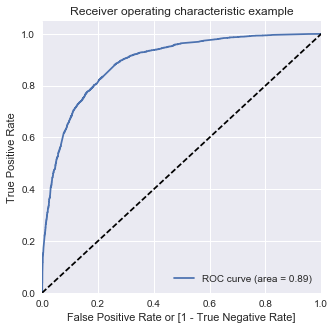

In [197]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [198]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      3871
          1       0.79      0.71      0.75      2375

avg / total       0.82      0.82      0.82      6246



## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [199]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,Convert_Prob,Converted,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.528555,1,6676,1,1,1,1,1,1,1,0,0,0,0
1,0.739707,1,6138,1,1,1,1,1,1,1,1,1,0,0
2,0.913230,1,8650,1,1,1,1,1,1,1,1,1,1,1
3,0.032917,0,3423,0,1,0,0,0,0,0,0,0,0,0
4,0.117693,0,6552,0,1,1,0,0,0,0,0,0,0,0
5,0.092348,1,1696,0,1,0,0,0,0,0,0,0,0,0
6,0.922553,1,2110,1,1,1,1,1,1,1,1,1,1,1
7,0.039749,0,6830,0,1,0,0,0,0,0,0,0,0,0
8,0.363035,0,2581,0,1,1,1,1,0,0,0,0,0,0
9,0.083607,0,5927,0,1,0,0,0,0,0,0,0,0,0


In [200]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision','recall'])
from sklearn.metrics import confusion_matrix

num = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    precision = cm1[1,1]/(cm1[1,1]+cm1[0,1])
    recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision, recall ]
print(cutoff_df)

     prob  accuracy     sensi     speci  precision    recall
0.9   0.9  0.714057  0.270737  0.986050   0.922525  0.270737
0.8   0.8  0.759686  0.423158  0.966159   0.884683  0.423158
0.7   0.7  0.783541  0.514105  0.948850   0.860465  0.514105
0.6   0.6  0.807237  0.631579  0.915009   0.820120  0.631579
0.5   0.5  0.817963  0.708632  0.885043   0.790883  0.708632
0.4   0.4  0.815082  0.776421  0.838801   0.747164  0.776421
0.3   0.3  0.793628  0.879579  0.740894   0.675614  0.879579
0.2   0.2  0.761287  0.921684  0.662878   0.626503  0.921684
0.1   0.1  0.610951  0.978526  0.385430   0.494153  0.978526
0.0   0.0  0.380243  1.000000  0.000000   0.380243  1.000000


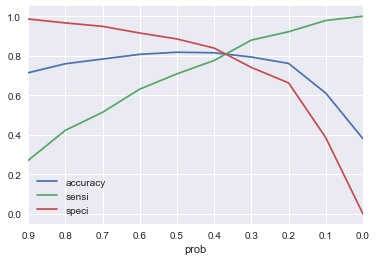

In [201]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

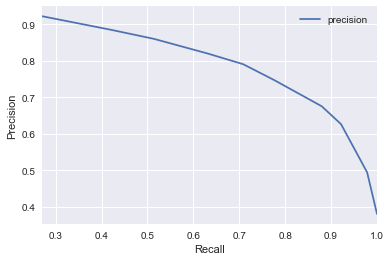

In [202]:
# Let's plot precision and recall for various probabilities.
cutoff_df_pre_rec = cutoff_df[['prob','precision','recall']]

# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(6,6))
cutoff_df_pre_rec.plot.line(x= 'recall' , y='precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

#### From the graphs above, 0.36 is the optimum point to take it as a cutoff probability.

In [203]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.528555,1,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,0.739707,1,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,0.913230,1,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0.032917,0,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0.117693,0,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [204]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.80915786103105991

In [205]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3157,  714],
       [ 478, 1897]])

In [206]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

Sensitivity 0.798736842105


Specificity 0.815551537071


In [208]:
# Calculate false postive rate - predicting Convert when customer does not have Converted
print("false postive rate",FP/ float(TN+FP))

false postive rate 0.184448462929


In [209]:
# Positive predictive value 
print("Positive predictive value",TP / float(TP+FP))
print("\n")

# Negative predictive value
print("Negative predictive value",TN / float(TN+ FN))

Positive predictive value 0.72654155496


Negative predictive value 0.868500687758


### Precision and Recall

In [210]:
# Looking at the confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3157,  714],
       [ 478, 1897]])

In [211]:
##### Precision
TP / TP + FP

print("Precision score:",confusion3[1,1]/(confusion3[0,1]+confusion3[1,1]))

Precision score: 0.72654155496


In [212]:
##### Recall
TP / TP + FN

print("Recall score:",confusion3[1,1]/(confusion3[1,0]+confusion3[1,1]))

Recall score: 0.798736842105


### Precision and recall tradeoff

In [213]:
from sklearn.metrics import precision_recall_curve

In [214]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

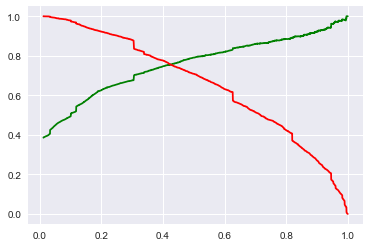

In [215]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### <span style="color:blue">Since Precision and recall tradeoff is giving cutoff 0.42 so again predicting for cutoff 0.42</span>

In [216]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.528555,1,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,0.739707,1,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,0.913230,1,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0.032917,0,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0.117693,0,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [217]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.81396093499839894

In [218]:
confusion2_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2_1

array([[3281,  590],
       [ 572, 1803]])

In [219]:
TP = confusion2_1[1,1] # true positive 
TN = confusion2_1[0,0] # true negatives
FP = confusion2_1[0,1] # false positives
FN = confusion2_1[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

Sensitivity 0.759157894737


Specificity 0.847584603462


In [221]:
# Calculate false postive rate - predicting Convert when customer does not have Converted
print("false postive rate",FP/ float(TN+FP))

false postive rate 0.152415396538


In [222]:
# Positive predictive value 
print("Positive predictive value",TP / float(TP+FP))
print("\n")

# Negative predictive value
print("Negative predictive value",TN / float(TN+ FN))

Positive predictive value 0.75344755537


Negative predictive value 0.851544251233


In [223]:
##### Precision
TP / TP + FP

print("Precision score:",confusion2_1[1,1]/(confusion2_1[0,1]+confusion2_1[1,1]))

Precision score: 0.75344755537


In [224]:
##### Recall
TP / TP + FN

print("Recall score:",confusion2_1[1,1]/(confusion2_1[1,0]+confusion2_1[1,1]))

Recall score: 0.759157894737


#### <span style="color:blue">But our target conversion rate i.e. precision is 80%, so to achieve this we need cutoff probability 0.51.</span>
__Note:__ If we increase cutoff beyond 0.51, recall value goes down below 0.70. <br>
So taking cutoff prob as 0.51 to get equal or close to 80% precision and avoid decreasing recall value to below 0.70

In [225]:
# Predicting final_predicted for leads
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.51 else 0)

y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.528555,1,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,0.739707,1,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,0.913230,1,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0.032917,0,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0.117693,0,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [226]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.81732308677553633

In [227]:
confusion2_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2_2

array([[3439,  432],
       [ 709, 1666]])

In [228]:
TP = confusion2_2[1,1] # true positive 
TN = confusion2_2[0,0] # true negatives
FP = confusion2_2[0,1] # false positives
FN = confusion2_2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity",TN / float(TN+FP))

Sensitivity 0.701473684211


Specificity 0.888400929992


In [230]:
# Calculate false postive rate - predicting Convert when customer does not have Converted
print("false postive rate",FP/ float(TN+FP))

false postive rate 0.111599070008


In [231]:
# Positive predictive value 
print("Positive predictive value",TP / float(TP+FP))
print("\n")

# Negative predictive value
print("Negative predictive value",TN / float(TN+ FN))

Positive predictive value 0.794089609152


Negative predictive value 0.829074252652


In [232]:
##### Precision
TP / TP + FP

print("Precision score:",confusion2_2[1,1]/(confusion2_2[0,1]+confusion2_2[1,1]))

Precision score: 0.794089609152


In [233]:
##### Recall
TP / TP + FN

print("Recall score:",confusion2_2[1,1]/(confusion2_2[1,0]+confusion2_2[1,1]))

Recall score: 0.701473684211


## Step 11: Making predictions on the test set

In [234]:
# Scaling features of test data
X_test[['TotalVisits','TotTimeSpent','PageViewsPerVisit']] = scaler.transform(X_test[['TotalVisits','TotTimeSpent',
                                                                                      'PageViewsPerVisit']])
X_test.head()

,DoNotEmail,TotalVisits,TotTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,...,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Bounced,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Unreachable
7625,0,-0.397202,2.077703,-0.136180,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5207,0,0.297929,0.739164,0.926758,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2390,0,-1.092332,-0.878390,-1.199117,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4362,0,-0.397202,-0.455310,-0.136180,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1023,0,4.121147,-0.300302,1.458226,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [235]:
# Applying learning of train dataset to test dataset
X_test = X_test[col]

# Adding constant
X_test_sm = sm.add_constant(X_test)
X_test.head()

,DoNotEmail,TotalVisits,TotTimeSpent,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Referral Sites,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Other,CurrentOccupation_Working Professional,LastNotableActivity_Unreachable
7625,0,-0.397202,2.077703,0,1,0,0,0,0,0,0,0,0,0,0,0
5207,0,0.297929,0.739164,0,1,0,0,0,0,0,0,0,0,0,0,0
2390,0,-1.092332,-0.878390,1,0,0,0,0,0,0,0,0,1,0,0,0
4362,0,-0.397202,-0.455310,0,0,1,0,0,0,0,0,0,1,0,0,0
1023,0,4.121147,-0.300302,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Making predictions on the test set

In [236]:
# Making prediction
y_test_pred = res.predict(X_test_sm)

In [237]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.688674
1,0.368810
2,0.945469
3,0.437373
4,0.279386


In [238]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
7625,0,7625
5207,1,5207
2390,1,2390
4362,0,4362
1023,0,1023


In [239]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [240]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,7625,0.688674
1,1,5207,0.368810
2,1,2390,0.945469
3,0,4362,0.437373
4,0,1023,0.279386


In [241]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Convert_Prob'], axis=1)
y_pred_final.head()

,LeadID,Converted,Convert_Prob
0,7625,0,0.688674
1,5207,1,0.368810
2,2390,1,0.945469
3,4362,0,0.437373
4,1023,0,0.279386


In [242]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.51 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,7625,0,0.688674,1
1,5207,1,0.368810,0
2,2390,1,0.945469,1
3,4362,0,0.437373,0
4,1023,0,0.279386,0


#### Let's check the overall accuracy on test data

In [243]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8177744585511576

In [244]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1501,  183],
       [ 305,  689]])

In [245]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.693158953722


Specificity: 0.891330166271


#### Precision and Recall on test data

In [247]:
##### Precision
TP / TP + FP

print("Precision score:",confusion4[1,1]/(confusion4[0,1]+confusion4[1,1]))

Precision score: 0.790137614679


In [248]:
##### Recall
TP / TP + FN

print("Recall score:",confusion4[1,1]/(confusion4[1,0]+confusion4[1,1]))

Recall score: 0.693158953722


In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86      1684
          1       0.79      0.69      0.74       994

avg / total       0.82      0.82      0.82      2678



## Step 12: Calculating Lead Score
Lead Score = 100*(probability of Converted)

#### Calculating lead score for train data

In [250]:
# Inspecting final predicted train dataframe
y_train_pred_final.head()

,Convert_Prob,Converted,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.528555,1,6676,1,1,1,1,1,1,1,0,0,0,0,1
1,0.739707,1,6138,1,1,1,1,1,1,1,1,1,0,0,1
2,0.913230,1,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0.032917,0,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0.117693,0,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [251]:
# Selecting only required columns
y_train_lead_score = y_train_pred_final[['Convert_Prob','Converted','LeadID','final_predicted']]

# Calculating lead_score
y_train_lead_score['Lead_Score'] = round(y_train_lead_score['Convert_Prob']*100, 2)
y_train_lead_score.head()

,Convert_Prob,Converted,LeadID,final_predicted,Lead_Score
0,0.528555,1,6676,1,52.86
1,0.739707,1,6138,1,73.97
2,0.913230,1,8650,1,91.32
3,0.032917,0,3423,0,3.29
4,0.117693,0,6552,0,11.77


#### Calculating lead score for test data

In [252]:
# Inspecting final predicted test dataframe
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted
0,7625,0,0.688674,1
1,5207,1,0.368810,0
2,2390,1,0.945469,1
3,4362,0,0.437373,0
4,1023,0,0.279386,0


In [253]:
# Selecting only required columns
y_test_lead_score = y_pred_final

# Calculating lead_score
y_test_lead_score['Lead_Score'] = round(y_test_lead_score['Convert_Prob']*100, 2)
y_test_lead_score.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,7625,0,0.688674,1,68.87
1,5207,1,0.368810,0,36.88
2,2390,1,0.945469,1,94.55
3,4362,0,0.437373,0,43.74
4,1023,0,0.279386,0,27.94


#### Lead Score for whole dataset (i.e. train data + test data)

In [254]:
# Concatenating train and test dataframe with lead score
lead_score_calculation = pd.concat(objs = [y_train_lead_score, y_test_lead_score], axis=0, join='outer')

# Inspecting shape of whole dataframe
print(lead_score_calculation.shape)

lead_score_calculation.head()

(8924, 5)


,Convert_Prob,Converted,LeadID,Lead_Score,final_predicted
0,0.528555,1,6676,52.86,1
1,0.739707,1,6138,73.97,1
2,0.913230,1,8650,91.32,1
3,0.032917,0,3423,3.29,0
4,0.117693,0,6552,11.77,0


## Q/ A of Word file

<span style="color:red">__Q1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?__</span>

The top three variables contributing most to the probability of a lead getting converted are :
- <span style="color:blue">__Last Activity__</span>
- <span style="color:blue">__What is your Current Occupation__</span>
- <span style="color:blue">__Lead Origin__</span>

<span style="color:red">__Q2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?__</span>

The top 3 categorical/dummy variables in our final model which should be focused the most on in order to increase the probability of lead conversion are:
- <span style="color:blue">__LastActivity : Had a Phone Conversation__ (LastActivity_Had a Phone Conversation)</span>
- <span style="color:blue">__What is your current occupation : Working Professional__ (CurrentOccupation_Working Professional)</span>
- <span style="color:blue">__Lead Origin : Lead Add Form__ (LeadOrigin_Lead Add Form)</span>






<span style="color:red">__Q3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.__</span>

To make the lead conversion more aggressive, we can tune the model in such a way that we do not miss out on any potential lead. This can be done by reducing the hyper parameter of the model i.e. the threshold (cut-off) probability. This way our model will predict more customers as 'HOT LEADS'. If we take the threshold probability as 0.15, we achieve a sensitivity (True Positive Rate) of around 94% i.e. (Out of the total Converts we have predicted 94% of them as Hot Leads)

In [255]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.15 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,7625,0,0.688674,1,68.87
1,5207,1,0.368810,1,36.88
2,2390,1,0.945469,1,94.55
3,4362,0,0.437373,1,43.74
4,1023,0,0.279386,1,27.94


In [256]:
##### Let's check the overall accuracy on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.70500373412994777

In [257]:
confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_3

array([[957, 727],
       [ 63, 931]])

In [258]:
TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

In [259]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.93661971831


Specificity: 0.568289786223


In [260]:
# Positive predictive value 
print (TP / float(TP+FP))

0.561519903498


#### Precision and Recall on test data

In [261]:
##### Precision
TP / TP + FP

print("Precision score:",TP/(FP+TP))

Precision score: 0.561519903498


In [262]:
##### Recall
TP / TP + FN

print("Recall score:",TP/(FN+TP))

Recall score: 0.93661971831


<span style="color:red">__Q4. At times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.__</span>

To minimize the rate of useless phone calls, we can tune the model in such a way that we predict only those customers as hot leads which have a very high probability of conversion. This can be done by increasing the hyper parameter of the model i.e. the threshold (cut-off) probability. This way our model will predict less customers as 'HOT LEADS'. If we take the threshold probability as 0.8, we achieve Precision (Positive Predicted Value) of around 90% i.e. 90% of the Predicted Hot Leads have converted. And False Positive Rate is only 3% (i.e. only 3% useless phone calls)

In [263]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.8 else 0)
y_pred_final.head()

,LeadID,Converted,Convert_Prob,final_predicted,Lead_Score
0,7625,0,0.688674,0,68.87
1,5207,1,0.368810,0,36.88
2,2390,1,0.945469,1,94.55
3,4362,0,0.437373,0,43.74
4,1023,0,0.279386,0,27.94


In [264]:
##### Let's check the overall accuracy on test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7696041822255415

In [265]:
confusion_4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_4

array([[1633,   51],
       [ 566,  428]])

In [266]:
TP = confusion_4[1,1] # true positive 
TN = confusion_4[0,0] # true negatives
FP = confusion_4[0,1] # false positives
FN = confusion_4[1,0] # false negatives

In [267]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",TP / float(TP+FN))
print("\n")

# Let us calculate specificity
print("Specificity:",TN / float(TN+FP))

Sensitivity: 0.430583501006


Specificity: 0.969714964371


In [268]:
#False Positive Rate (1-specificity)
print(1-(TN/float(TN+FP)))

0.0302850356295


#### Precision and Recall on test data

In [269]:
##### Precision
TP / TP + FP

print("Precision score:",TP/(FP+TP))

Precision score: 0.893528183716


In [270]:
##### Recall
TP / TP + FN

print("Recall score:",TP/(FN+TP))

Recall score: 0.430583501006
